# Imports

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud
##

import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))
##
from plotly.subplots import make_subplots
from collections import Counter, defaultdict
import plotly.express as px
import plotly.graph_objects as go
#

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
#
stopWords_nltk = set(stopwords.words('english'))
#
import re
#
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Helpers

In [2]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

sns.set_context('poster')

In [ ]:
df['Character Count'] = df['review'].apply(lambda x: len(str(x)))
##
def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)


In [3]:
df1 = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Hotel_Reviews_Trip_Advisor.csv')
df2 = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\tripadvisor_hotel_reviews_structured.csv')

In [4]:
df2_new = df2.rename(columns={'Review': 'review', 'Rating': 'rating'} )
df1_new = df1.rename(columns={'score': 'rating'})
##
df1_new = df1_new.drop(['hotel_name', 'review_summary'], axis=1 )
df1_new = df1_new.set_index('Unnamed: 0')
##
df2_new['rating'] = df2_new['rating'].astype(float)
##
frames = [df1_new, df2_new]
df = pd.concat(frames)
display(df)

,rating,review
0.0,1.0,Its hard to find words that can describe this ...
1.0,1.0,"Absolutely terrible. Cracked ceiling, tiny roo..."
2.0,1.0,Very disappointed firstly i checked in online ...
3.0,1.0,First of all we arrived wanting to park at the...
4.0,1.0,"Hello, I currently staying @ Hilton Metropole..."
...,...,...
7100.0,5.0,great hotel 12 females visited hotel hotel exc...
7101.0,5.0,"excellent hotel, hotel great bargain, staff fr..."
7102.0,5.0,great hotel staff excellent rooms clean nicely...
7103.0,5.0,"hotel madrid hotel perfect, location tiny quie..."


In [5]:
df['rating'] = df['rating'].fillna((df['rating'].mean()))
df['rating'] = df['rating'].astype(int)
#
df['review'] = df['review'].astype(str)

# Saving For Neural Network

In [6]:
df.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\neural_network_data.csv',index=False)

# Preprocessing

In [7]:
df["tokenized_review"] = df.review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))
##
import string
regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

df["review"] = df["review"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

df['tokenized_review'] = df['tokenized_review'].apply(lambda x: remove_punct(x))
###

# Visulations

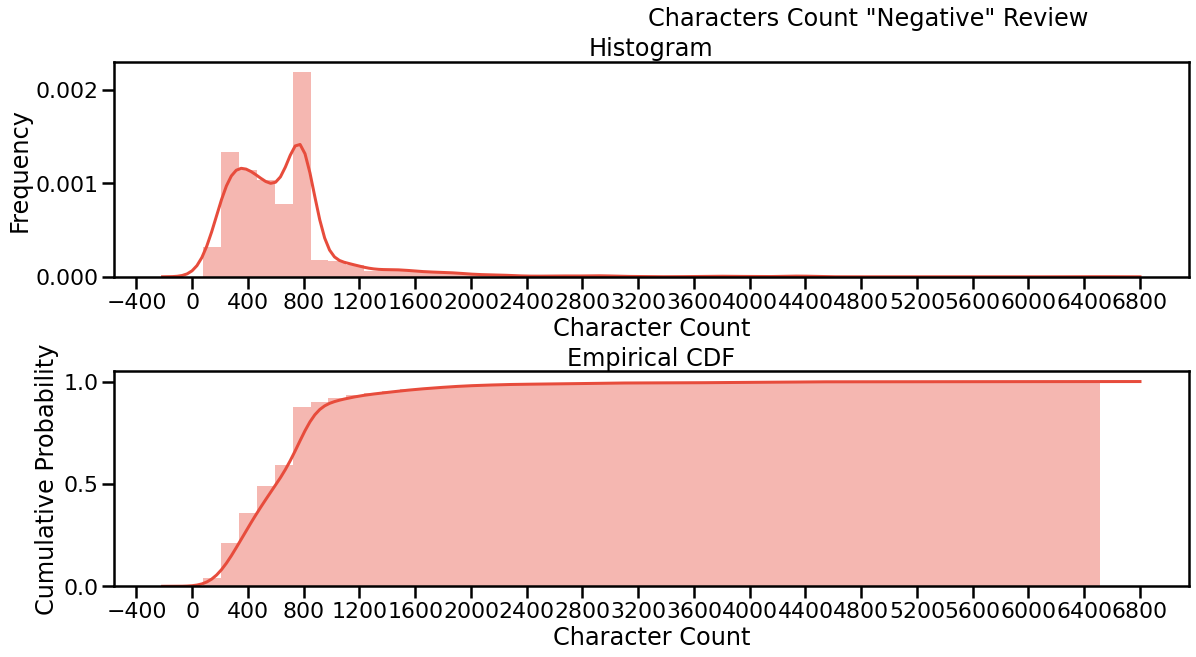

In [51]:
plot_dist3(df[df['rating'] == 1], 'Character Count',
           'Characters Count "Negative" Review')

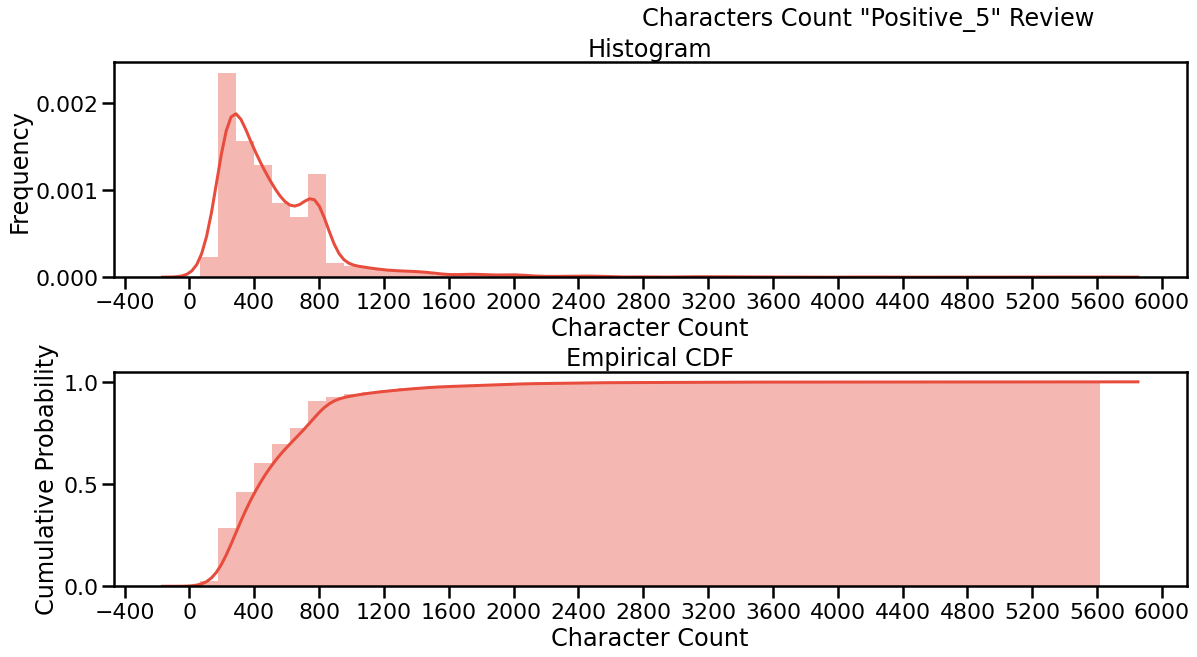

In [52]:
plot_dist3(df[df['rating'] == 5], 'Character Count',
           'Characters Count "Positive_5" Review')

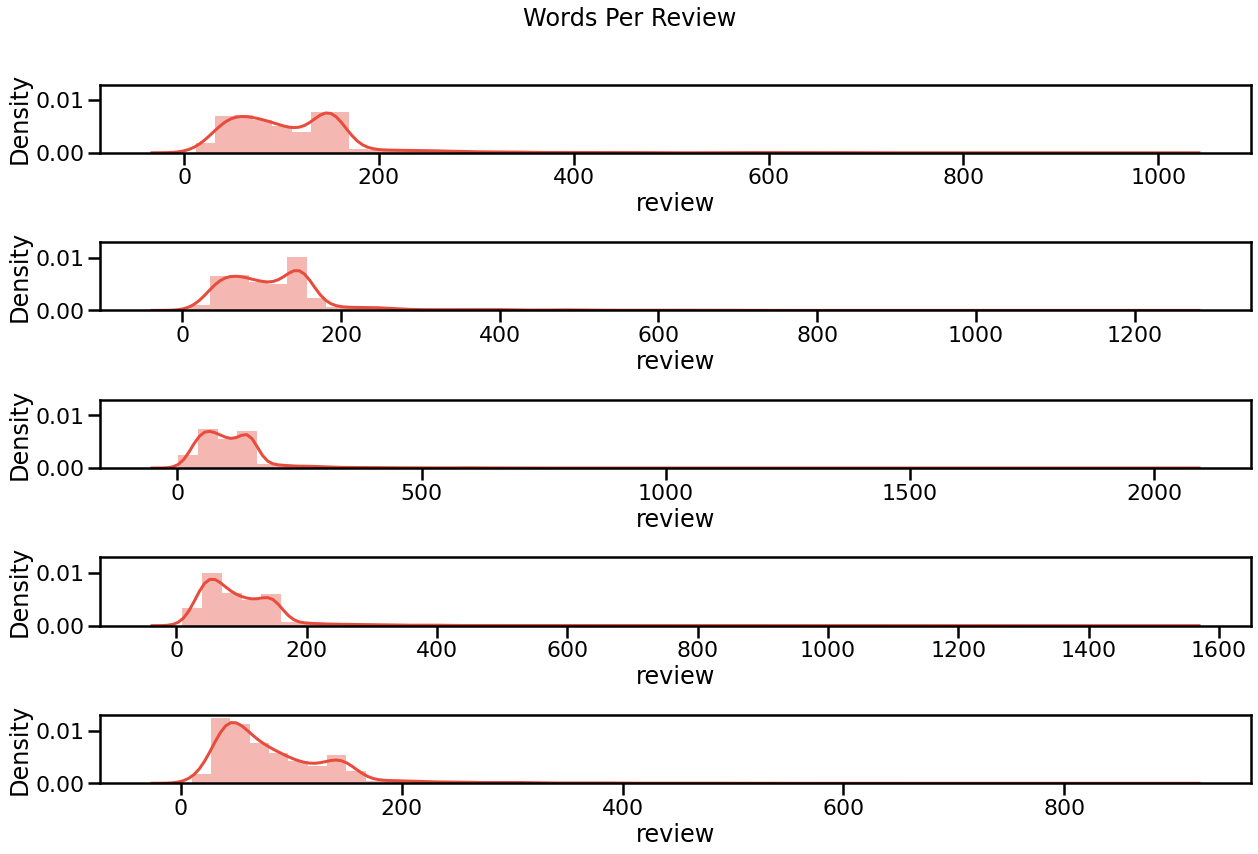

In [53]:
def plot_word_number_histogram(textno, textye, textz,textc, textv):

    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')
    sns.distplot(textc.str.split().map(lambda x: len(x)), ax=axes[3], color='#e74c3c')
    sns.distplot(textv.str.split().map(lambda x: len(x)), ax=axes[4], color='#e74c3c')

    fig.suptitle('Words Per Review', fontsize=24, va='baseline')

    fig.tight_layout()
##

###
plot_word_number_histogram(df[df['rating'] == 1]['review'],
                           df[df['rating'] == 2]['review'],
                           df[df['rating'] == 3]['review'],
                           df[df['rating'] == 4]['review'],
                           df[df['rating'] == 5]['review']
                          )
plt.show()

# Most Common Words

In [54]:
from collections import Counter, defaultdict

texts = df['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []

for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    ))
fig.show()

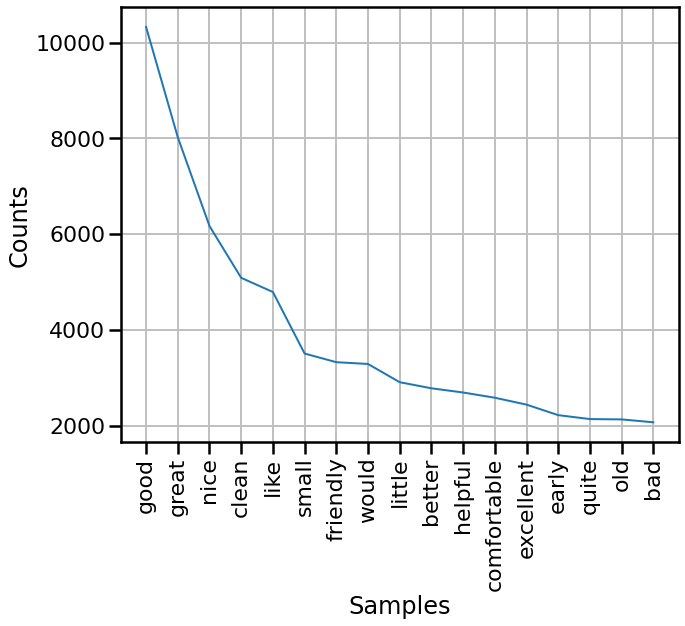

In [55]:
flat_review_summary = " ".join(df['review'].values)
##
flat_list_review_summaries = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_reviews = tokenizer.tokenize(flat_review_summary)
##
for review in tokenized_reviews:
    flat_list_review_summaries.append(review.lower())
##
stop_words = stopwords.words("english")

flat_list_review_summaries_no_stop = [word for word in flat_list_review_summaries if word not in stop_words]
##
for word in ['hotel','room','staff','stay','location','rooms','service','room','n','time','food','day','beach', 'stayed','night','breakfast','really','place','resort','pool','walk','people','bar','got','bed','area','check','restaurant','bathroom','best','floor','water','went','restaurants','booked','recommend','hilton','trip','desk','nights','night','view','hotels','free','way','away','bit','airport','minutes','price','make','morning','city','buffet','say','experience','lobby','shower','street','reviews','reception','days','close','need','going','arrived','definitely','told','beds','bed','th','took','use','one','station','times','think','us','flight','get']:
    stop_words.append(word)
##
flat_list_review_summaries_no_stop_2 =  [word for word in flat_list_review_summaries_no_stop if word not in stop_words]
#
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_summaries_no_stop_2).plot(17)
plt.show()

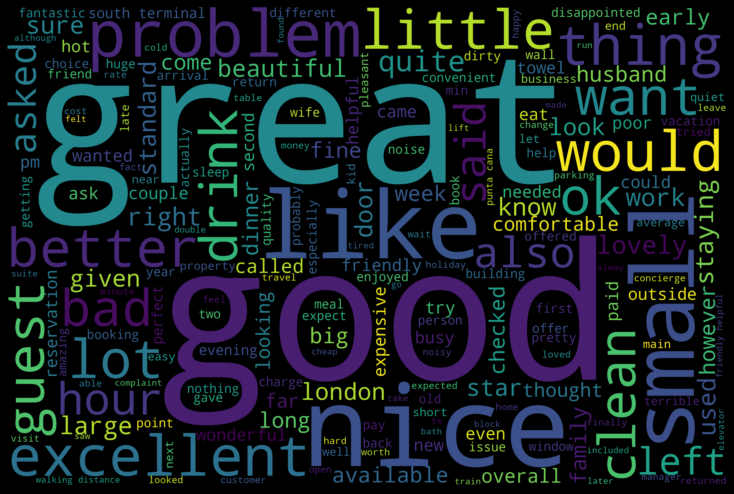

In [56]:
flat_clean_sum_str = " ".join(flat_list_review_summaries_no_stop_2)
##
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_sum_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Most Common Words at Each Class

In [57]:
colors = ['gold', 'mediumturquoise', 'lightgreen','red','yellow','blue']

fig = make_subplots(rows=1, cols=5)
title_ = ["1", "2", "3",'4','5']

for i in range(1,6):
    texts = df[df["rating"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:100]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
    marker=dict(color=colors[i])), 1, i)

fig.update_layout(
    autosize=False,
    width=1500,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

##
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]
##
for i in range(1,6):
    texts = df[df["rating"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
    marker=dict(color=colors[i])), 1, i),

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
        )
    ))

fig.show()

## in- the benzeri kelimeleri silmelisin

In [61]:
df.head()

,rating,review,tokenized_review,sent_token_length,char_count,Character Count
0.0,1,its hard to find words that can describe this ...,Its hard to find words that can describe this ...,216,931,931
1.0,1,absolutely terrible cracked ceiling tiny roo...,Absolutely terrible Cracked ceiling tiny r...,94,446,446
2.0,1,very disappointed firstly i checked in online ...,Very disappointed firstly i checked in online ...,139,679,679
3.0,1,first of all we arrived wanting to park at the...,First of all we arrived wanting to park at the...,169,782,782
4.0,1,hello i currently staying hilton metropole...,Hello I currently staying Hilton Metropole...,175,789,789


# Preprocessing_2

# Helpers

In [64]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [65]:
def apply_stem(doc):

    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '

    return stem_doc



def apply_lem(doc):

    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '

    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '

    return lem_doc

# Stemming vs Lemmatization

In [66]:
df['review_stemmed'] = df['review'].apply(apply_stem)
df['review_lemmed'] = df['review'].apply(apply_lem)

In [67]:
review_index_to_check = 3000
print("ORIGINAL REVIEW:",'\n',df['review'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW: 
 i have finally decided not to stay at the london hilton metropole ever again  i have been staying there for many years now because of its central location   walking distance to oxford  regent streets  however over the past year the check in service has become surprisingly bizarre  i don t think this has anything to do with the on going renovations  i am an hiltonhonors card holder   gold who consistently books a king deluxe or executive room  on three occasions  upon check in  i was told  we are completely booked but we are pleased to upgrade you to a much better room  only to open the door and walk into a box with 2 single beds  once is an error but three times appears to be a strategy  how does a king upgrade to a single bed     on each occasion  after complaining i was moved  

STEMMED REIVEW: 
 i have final decid not to stay at the london hilton metropol ever again  i have been stay there for mani year now becaus of it central locat   walk distanc to oxford  rege

In [68]:
df.head()

,rating,review,tokenized_review,sent_token_length,char_count,Character Count,review_stemmed,review_lemmed
0.0,1,its hard to find words that can describe this ...,Its hard to find words that can describe this ...,216,931,931,it hard to find word that can describ thi expe...,its hard to find word that can describe this e...
1.0,1,absolutely terrible cracked ceiling tiny roo...,Absolutely terrible Cracked ceiling tiny r...,94,446,446,absolut terribl crack ceil tini room bad qu...,absolutely terrible crack ceiling tiny room ...
2.0,1,very disappointed firstly i checked in online ...,Very disappointed firstly i checked in online ...,139,679,679,veri disappoint firstli i check in onlin but h...,very disappoint firstly i check in online but ...
3.0,1,first of all we arrived wanting to park at the...,First of all we arrived wanting to park at the...,169,782,782,first of all we arriv want to park at the hote...,first of all we arrive want to park at the hot...
4.0,1,hello i currently staying hilton metropole...,Hello I currently staying Hilton Metropole...,175,789,789,hello i current stay hilton metropol in lo...,hello i currently stay hilton metropole in...


# Train- Test Split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['rating']),
                                                    df['rating'],
                                                    test_size=.2,
                                                    random_state=42)

In [73]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13208, 7)
(3303, 7)
(13208,)
(3303,)


In [ ]:
# TF-IDF Vectorisation for Reviews

In [74]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize,
                              stop_words=stop_words,
                              ngram_range=(1,2),
                              min_df = 0.05)

x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['review_lemmed'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['review_lemmed'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(),
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(),
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()

,access,air,also,arrival,arrive,ask,available,back,bad,beautiful,...,visit,wait,wall,want,week,well,wonderful,work,worth,would
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.131088,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.000000,0.0,0.218531,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.00000,0.202489,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.326799,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.264549,0.0,0.245403,0.0,0.0,0.0,0.256604,0.0,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.196023
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.30836,0.000000,0.0,0.0,0.0,0.0,0.0,0.253633,0.0,0.000000


In [75]:
x_lemm_test_tfidf.head()

,access,air,also,arrival,arrive,ask,available,back,bad,beautiful,...,visit,wait,wall,want,week,well,wonderful,work,worth,would
0,0.0,0.000000,0.146638,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.117132
1,0.0,0.000000,0.000000,0.0,0.145177,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.183712,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.635324,0.000000,0.0,0.263895,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.253384,0.0,0.000000
3,0.0,0.000000,0.000000,0.0,0.169293,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.184438,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.366014,0.0,0.0,0.0,...,0.0,0.162171,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [76]:
print(x_lemm_train_tfidf.shape)
print(x_lemm_test_tfidf.shape)
print(y_train.shape)
print(y_test.shape)

(13208, 182)
(3303, 182)
(13208,)
(3303,)


# Saving Dataset For Modelling

In [78]:
x_lemm_train_tfidf.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_train_data.csv',index=False)
x_lemm_test_tfidf.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_test_data.csv',index=False)
y_train.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_train_data.csv',index=False)
y_test.to_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_test_data.csv',index=False)